In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import data
salary = pd.read_csv('Data.csv')
salary.head()

,Experience Years,Salary
0,9.5,97602.0
1,4.0,30165.0
2,2.0,73261.0
3,3.2,90174.0
4,5.1,61360.0


In [2]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  497 non-null    float64
 1   Salary            495 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [3]:
# Rows with null values
null_values = salary[salary.isnull().any(axis=1)]
print(null_values)


     Experience Years    Salary
5                 8.8       NaN
19                NaN  109637.0
92                NaN   36654.0
118               NaN   32282.0
142               5.9       NaN
213               1.4       NaN
484               5.4       NaN
495               1.6       NaN


In [4]:
# Fill missing values with a specific value (e.g., 0)
salary_filled = salary.fillna(0)

# Alternatively, fill with the mean of each column
salary_filled = salary.fillna(salary.mean(numeric_only=True))

# Verify the result
print(salary_filled.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  500 non-null    float64
 1   Salary            500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None


In [5]:
# Drop rows with null values
salary = salary.dropna()

# Verify the result
print(salary.info())


<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  492 non-null    float64
 1   Salary            492 non-null    float64
dtypes: float64(2)
memory usage: 11.5 KB
None


In [6]:
salary.describe()

,Experience Years,Salary
count,492.000000,492.000000
mean,5.808943,60960.983740
std,2.835188,30522.830016
min,1.000000,4155.000000
25%,3.300000,35201.750000
50%,5.900000,62336.500000
75%,8.200000,87466.000000
max,10.500000,123023.000000


### Scatter Plot
Scatter plots are used to visualize the relationship between two continuous variables. 
Here, we examine the correlation between years of experience and salary:
- **Why it's important**: Helps identify patterns or trends, such as whether salary increases with experience.
- **Key observations**: We might notice clustering, outliers, or a linear/non-linear trend.


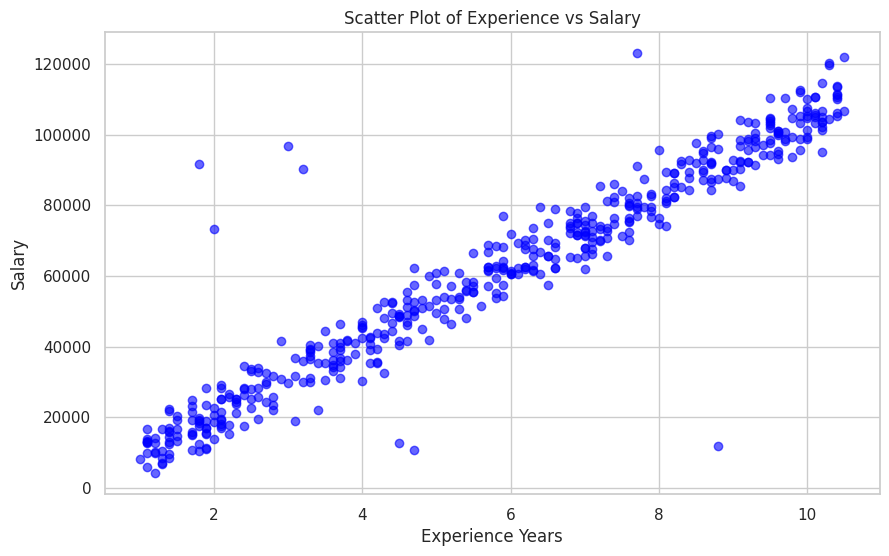

In [7]:
# Set style for plots
sns.set(style="whitegrid")

# 1. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(salary['Experience Years'], salary['Salary'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Experience vs Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()



### Line Plot: Mean Salary by Experience
This plot shows the average salary for each experience level:
- **Why it's important**: Reveals trends over time, smoothing out individual variances.
- **Key observations**: Useful for understanding how salary evolves with experience on average.


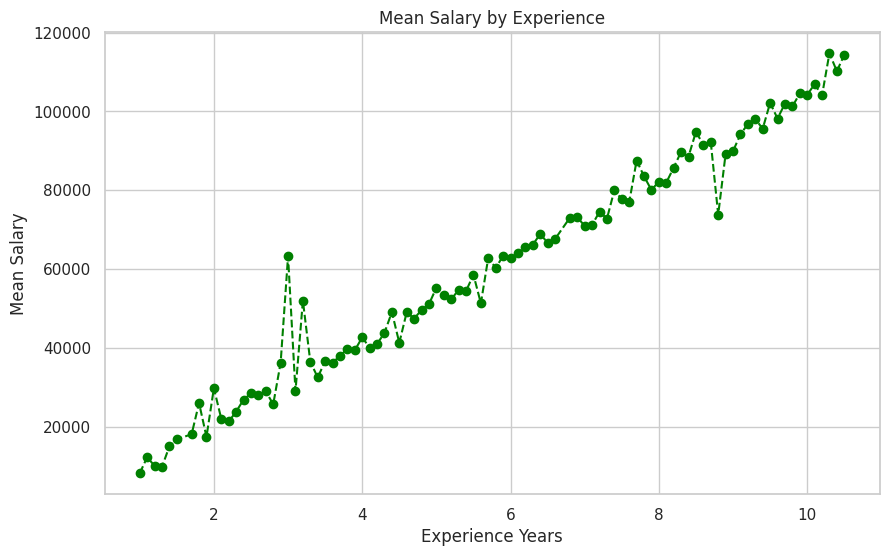

In [8]:

#Line Plot (Mean Salary by Experience Year)
mean_salary = salary.groupby('Experience Years')['Salary'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_salary.index, mean_salary.values, color='green', marker='o', linestyle='--')
plt.title('Mean Salary by Experience')
plt.xlabel('Experience Years')
plt.ylabel('Mean Salary')
plt.show()


### Histogram: Salary Distribution
Histograms show the distribution of a single variable:
- **Why it's important**: Provides insight into how salaries are spread across the dataset.
- **Key observations**: Identifies common salary ranges and whether the distribution is skewed.


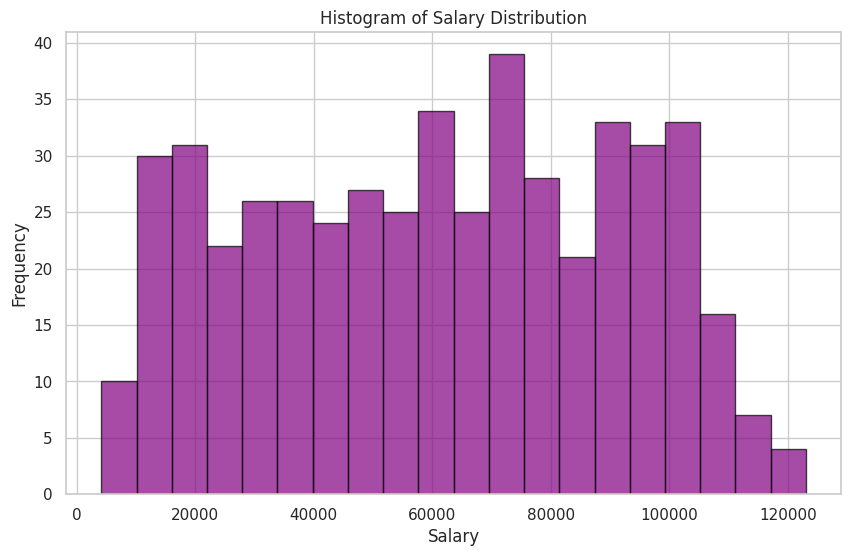

In [9]:

#Histogram (Salary Distribution)
plt.figure(figsize=(10, 6))
plt.hist(salary['Salary'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


### Box Plot: Experience vs. Salary
Box plots provide a summary of data distribution across categories:
- **Why it's important**: Highlights median, quartiles, and potential outliers.
- **Key observations**: Helps compare salary variability across experience levels.


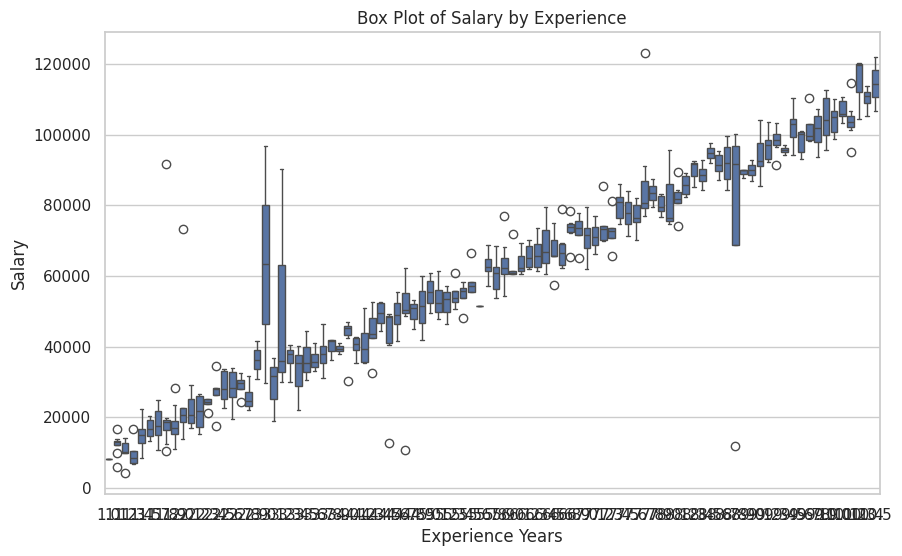

In [10]:

#Box Plot (Experience vs Salary)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience Years', y='Salary', data=salary)
plt.title('Box Plot of Salary by Experience')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()


/tmp/ipykernel_29987/2885278341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary['Salary'], color='red', shade=True)


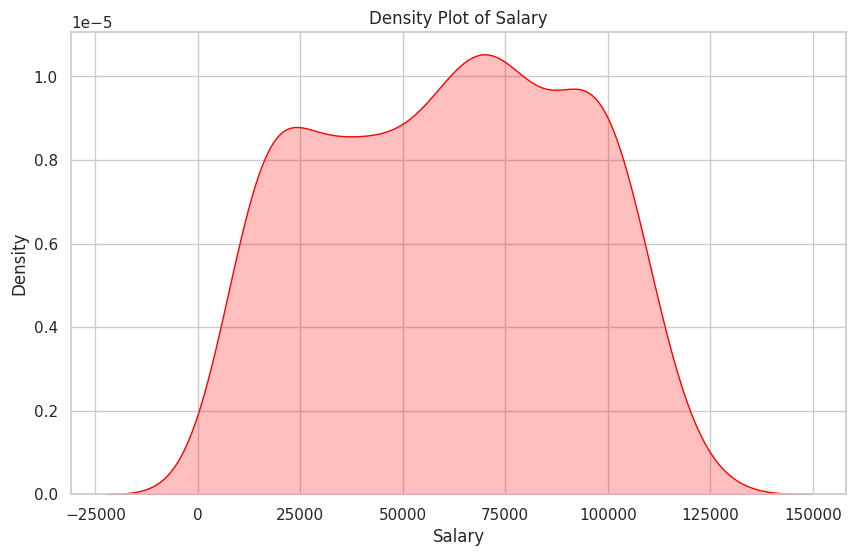

In [11]:

#Density Plot (Salary Distribution)
plt.figure(figsize=(10, 6))
sns.kdeplot(salary['Salary'], color='red', shade=True)
plt.title('Density Plot of Salary')
plt.xlabel('Salary')
plt.show()


/tmp/ipykernel_29987/3691059252.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary_binned = salary.groupby('Experience Binned')['Salary'].mean()


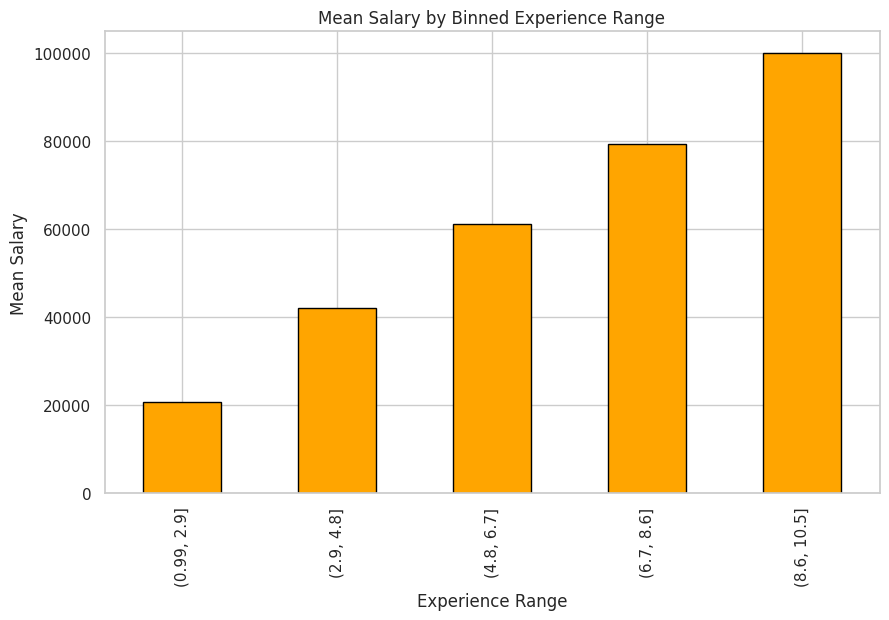

In [12]:
#Bar Plot (Mean Salary for Binned Experience Ranges)
salary['Experience Binned'] = pd.cut(salary['Experience Years'], bins=5)
mean_salary_binned = salary.groupby('Experience Binned')['Salary'].mean()
plt.figure(figsize=(10, 6))
mean_salary_binned.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Mean Salary by Binned Experience Range')
plt.xlabel('Experience Range')
plt.ylabel('Mean Salary')
plt.show()

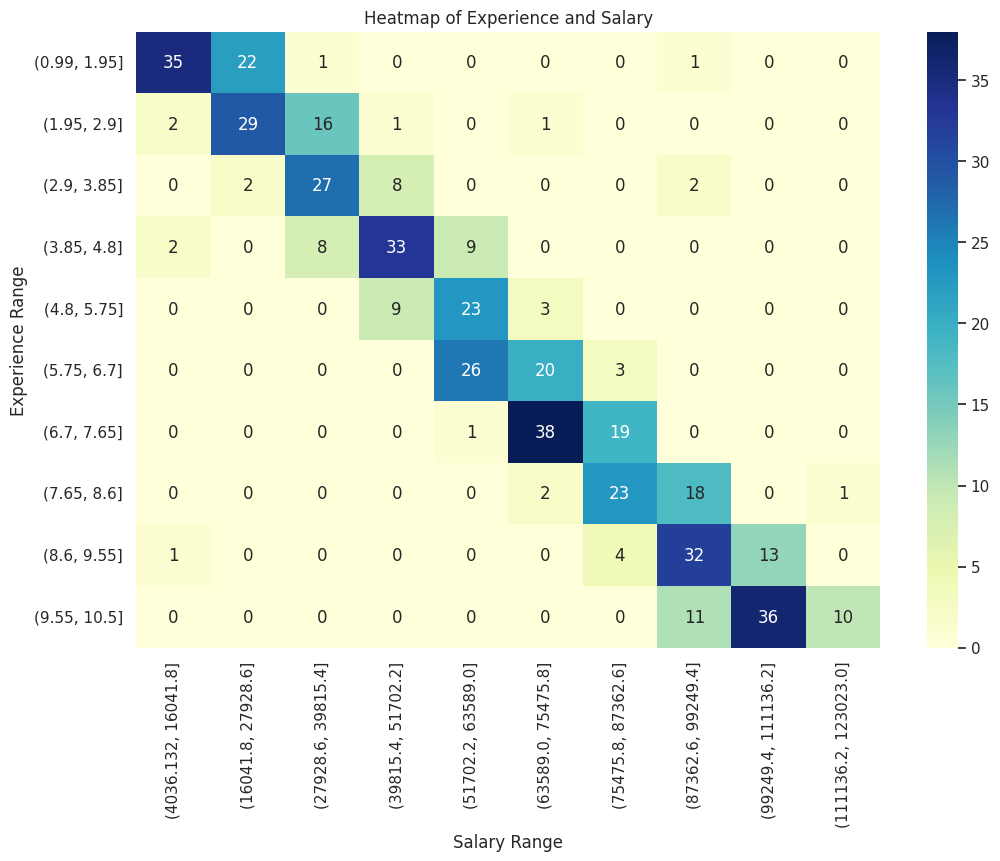

In [13]:
#define target (y) and features (X)
#Heatmap (Salary by Binned Experience and Salary Ranges)
experience_bins = pd.cut(salary['Experience Years'], bins=10)
salary_bins = pd.cut(salary['Salary'], bins=10)
heatmap_salary = pd.crosstab(experience_bins, salary_bins)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_salary, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title('Heatmap of Experience and Salary')
plt.xlabel('Salary Range')
plt.ylabel('Experience Range')
plt.show()

### Linear Regression Model
A linear regression model is used to predict a target variable based on one or more features:
- **Target (y)**: Salary.
- **Feature (X)**: Experience Years.

Steps:
1. Split the data into training and testing sets.
2. Train the model on the training set.
3. Evaluate its performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE).


In [14]:
salary.columns

Index(['Experience Years', 'Salary', 'Experience Binned'], dtype='object')

In [15]:
y = salary['Salary']

In [16]:
X = salary[['Experience Years']]

In [17]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2529)

In [18]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((393, 1), (99, 1), (393,), (99,))

In [19]:
#select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
#train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [21]:
#predict model
y_pred = model.predict(X_test)

In [22]:
#Save the test data along with predictions
# Convert y_pred to a DataFrame for easier concatenation
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Salary'], index=X_test.index)

# Combine the test features, true target values, and predictions
results_df = pd.concat([X_test, y_test, y_pred_df], axis=1)
results_df.columns = ['Experience Years', 'Actual Salary', 'Predicted Salary']

# Save the combined DataFrame to a CSV file
results_df.to_csv('test_data_with_predictions1.csv', index=False)

In [23]:
#model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [24]:
mean_absolute_percentage_error(y_test,y_pred)

0.10213716980776381

In [25]:
# Display coefficients and intercept
print("Model Coefficients (Slope):", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients (Slope): [10371.70074048]
Model Intercept: 436.2783782746046


In [26]:
from sklearn.metrics import r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 5273.521821099644
Mean Absolute Percentage Error (MAPE): 0.10213716980776381
Mean Squared Error (MSE): 95927303.34681995
Root Mean Squared Error (RMSE): 9794.248483003683
R-squared (R²): 0.900927620929432


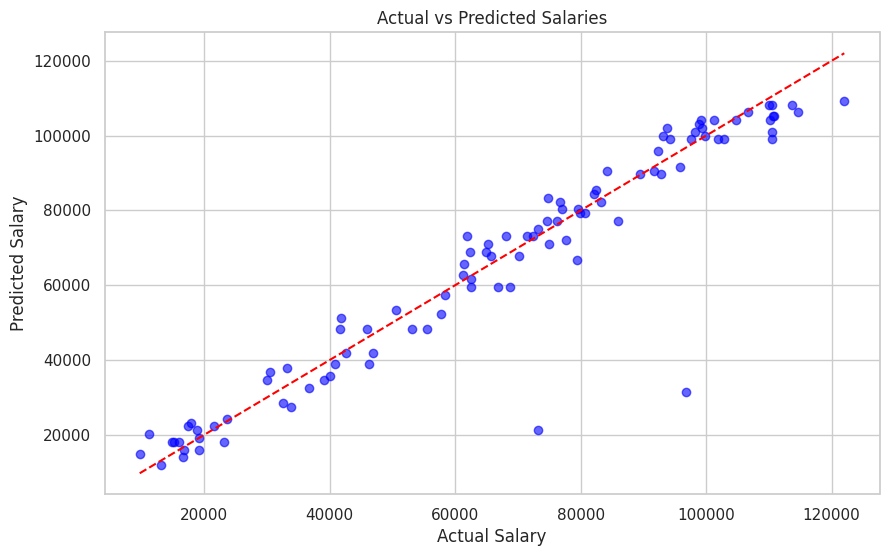

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


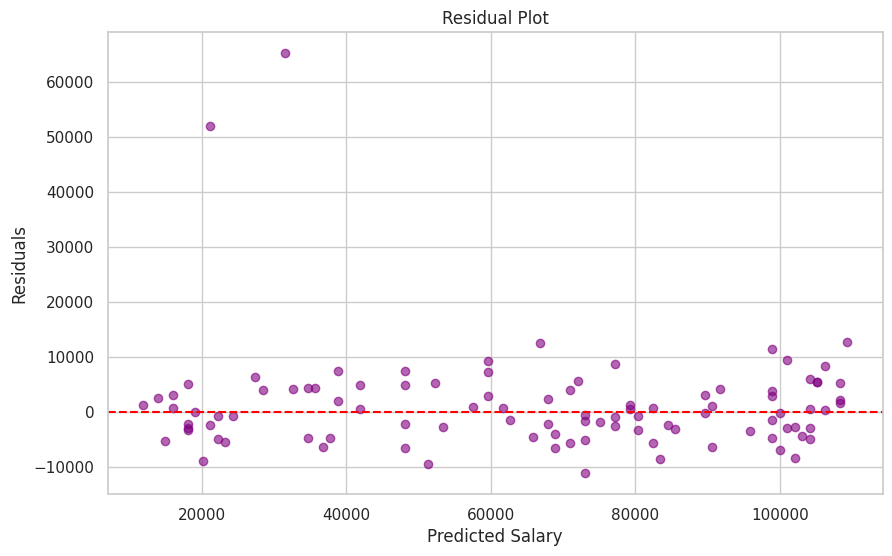

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.show()
